## PCA Analysis of Hyperparameters and Network Divergence

In [ ]:
import pandas as pd

In [ ]:
import plotly
import plotly.graph_objs as go

### VGG Architecture

In [ ]:
vgg_df = pd.read_csv('../wandb_results/vgg_cifar10_wandb_export.csv')

In [ ]:
vgg_df

In [ ]:
from sklearn.preprocessing import minmax_scale

In [ ]:
import math

In [ ]:
scaled_adam_epsilon = minmax_scale(vgg_df['adam_epsilon'])

In [ ]:
markersize = scaled_adam_epsilon
markercolor = vgg_df['learning_rate']

In [ ]:
fig = go.Figure()

In [ ]:
fig1= go.Scatter3d(x=vgg_df['epochs'],
                    y=vgg_df['batch_size'],
                    z=vgg_df['accuracy_diff'],
                    marker=dict(size=markersize,
                                color=markercolor,
                                colorscale='Viridis', 
                                colorbar=dict(thickness=20)),
                    line=dict (width=0.02),
                    mode='markers')
                   

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Epochs"),
                                yaxis=dict( title="Batch Size"),
                                zaxis=dict(title="Accuracy Difference")),)

plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True)



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(121, projection="3d")
ax2 = f.add_subplot(122, projection="3d")
# ax3 = f.add_subplot(133)
img = ax.scatter(vgg_df['learning_rate'], vgg_df['batch_size'], vgg_df['epochs'], c=vgg_df['pt_test_acc'], cmap="viridis", s=vgg_df['adam_epsilon']*100, alpha=1)
# f.colorbar(img, label='PT Test Accuracy', pad=0.2)
ax.set_xlabel("Learning Rate", labelpad=15)
ax.set_ylabel("Batch Size", labelpad=15)
ax.set_zlabel("Epochs", labelpad=15)
ax.set_title("PyTorch")
img.set_clim(0, 1)
img2 = ax2.scatter(vgg_df['learning_rate'], vgg_df['batch_size'], vgg_df['epochs'], c=vgg_df['tf_test_acc'], cmap="viridis", s=vgg_df['adam_epsilon']*100, alpha=1)
# f.colorbar(img2, label='TF Test Accuracy', pad=0.2)
img2.set_clim(0, 1)
plt.xlabel("Learning Rate", labelpad=15)
plt.ylabel("Batch Size", labelpad=15)
ax2.set_zlabel("Epochs", labelpad=15)
ax2.set_title("TensorFlow")
plt.tight_layout()
f.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.02, hspace=0.02)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = f.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = f.colorbar(img, cax=cb_ax, pad=0.5)

In [ ]:
import matplotlib as mpl

In [ ]:
np.mean(vgg_df['accuracy_diff'])

In [ ]:
dense_df['reaches_threshold'] = dense_df['accuracy_diff'] > np.median(dense_df['accuracy_diff'])

In [ ]:
dense_df_reaches_threshold = dense_df[dense_df['reaches_threshold']]

In [ ]:
dense_df_reaches_threshold['accuracy_diff']

In [ ]:
dense_df_below_threshold = dense_df[~dense_df['reaches_threshold']]

In [ ]:
dense_df_below_threshold['accuracy_diff']

In [ ]:
max(dense_df['accuracy_diff'])

In [ ]:
np.median(dense_df['accuracy_diff'])

In [ ]:
np.mean(dense_df['accuracy_diff'])

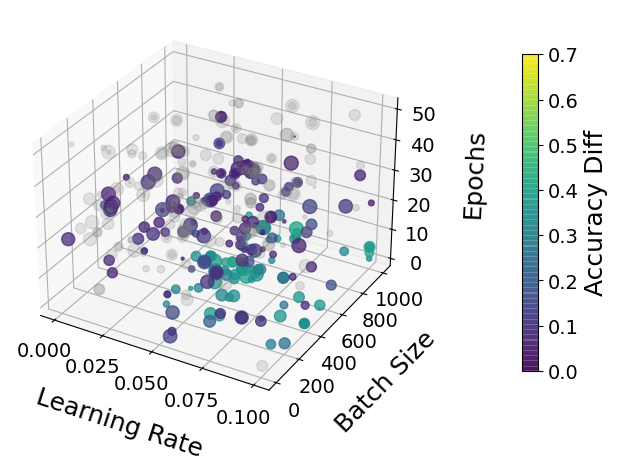

In [465]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img1 = ax.scatter(dense_df_below_threshold['learning_rate'], dense_df_below_threshold['batch_size'], dense_df_below_threshold['epochs'],  c="Grey", s=dense_df_below_threshold['adam_epsilon']*100, alpha=0.2, vmin=0, vmax=1)
img = ax.scatter(dense_df_reaches_threshold['learning_rate'], dense_df_reaches_threshold['batch_size'], dense_df_reaches_threshold['epochs'], c=dense_df_reaches_threshold['accuracy_diff'], cmap="viridis", s=dense_df_reaches_threshold['adam_epsilon']*100, alpha=0.75, vmin=0, vmax=0.7)
# img.set_clim(0, 1)
fig.colorbar(img, label='Accuracy Diff', pad=0.2, fraction=0.03)
plt.xlabel("Learning Rate", labelpad=15)
# ax.set_xticklabels(rotation = (45), fontsize = 10, va='bottom', ha='left')
plt.ylabel("Batch Size", labelpad=15)
ax.set_zlabel("Epochs", labelpad=15)
plt.tight_layout()
plt.locator_params(axis='x', nbins=5)
plt.show()

In [493]:
np.max(dense_df['tf_test_acc'])

0.7712000012397766

In [467]:
np.median(resnet_df['accuracy_diff'])

0.03854268257107052

In [ ]:
torch_model.state_dict().keys()

In [ ]:
min(vgg_df['learning_rate'])

In [ ]:
fig.savefig('densenet_params_5d_median_cutoff.png', dpi=500, bbox_inches="tight")

In [ ]:
plt.show()

In [ ]:
plt.scatter(vgg_df['learning_rate'], vgg_df['accuracy_diff'])

In [ ]:
plt.scatter(vgg_df['batch_size'], vgg_df['accuracy_diff'])

In [ ]:
plt.scatter(vgg_df['adam_epsilon'], vgg_df['accuracy_diff'])

In [ ]:
plt.scatter(vgg_df['epochs'], vgg_df['accuracy_diff'])

### Trying out PCA...

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
features = ['epochs', 'batch_size', 'learning_rate', 'adam_epsilon']
X = vgg_df[features].values
y = vgg_df['accuracy_diff'].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
# thanks to https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [ ]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(n_components=2, random_state=0)

# Fit PCA to features
principalComponents = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.get_covariance()

In [ ]:
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
import seaborn as sns

In [ ]:
# fig = plt.figure(figsize=(15, 15))
fig = plt.figure()
ax = fig.add_subplot(111)
img = plt.scatter(principalComponents[:, 0],principalComponents[:, 1] , c= vgg_df['accuracy_diff'], cmap="viridis")
fig.colorbar(img, orientation="vertical", label="Accuracy Differnece")
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
plt.savefig('vgg_pca_params.png', bbox_inches="tight", dpi=200)

### For DenseNet

In [ ]:
dense_df = pd.read_csv('../wandb_results/densenet_cifar10_wandb_export.csv')

In [ ]:
features = ['epochs', 'batch_size', 'learning_rate', 'adam_epsilon']
dense_X = dense_df[features].values
dense_y = dense_df['accuracy_diff'].values

In [ ]:
dense_X = StandardScaler().fit_transform(dense_X)

In [ ]:
dense_pca = PCA(n_components=2, random_state=0)

# Fit PCA to features
dense_principal_components = dense_pca.fit_transform(dense_X)

In [ ]:
dense_pca.get_covariance()

In [ ]:
dense_pca.explained_variance_ratio_

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
img = plt.scatter(dense_principal_components[:, 0],dense_principal_components[:, 1] , c= dense_df['accuracy_diff'], cmap="viridis")
fig.colorbar(img, orientation="vertical", label="Accuracy Difference")
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
plt.savefig('dense_pca_params.png', bbox_inches="tight", dpi=200)

### For ResNet

In [ ]:
resnet_df = pd.read_csv('../wandb_results/resnet_cifar10_wandb_export.csv')

In [ ]:
features = ['epochs', 'batch_size', 'learning_rate', 'adam_epsilon']
resnet_X = resnet_df[features].values
resnet_y = resnet_df['accuracy_diff'].values

In [ ]:
resnet_X = StandardScaler().fit_transform(resnet_X)

In [ ]:
resnet_pca = PCA(n_components=2, random_state=0)

# Fit PCA to features
resnet_principal_components = resnet_pca.fit_transform(resnet_X)

In [ ]:
resnet_pca.get_covariance()

In [ ]:
resnet_pca.explained_variance_ratio_

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
img = plt.scatter(resnet_principal_components[:, 0],resnet_principal_components[:, 1] , c= resnet_df['accuracy_diff'], cmap="viridis")
fig.colorbar(img, orientation="vertical", label="Accuracy Difference")
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
plt.savefig('resnet_pca_params.png', bbox_inches="tight", dpi=200)